# Advanced EDA: PV Solar Installations
**Dr. Dave Wanik - University of Connecticut**

-------------------------------------------------
This dataset is a bit of a mess - but it's real-world data! So let's try to get our arms around it and tell a compelling story with data.

This dataset *kind of* looks like a time series dataset - but I see it more as a dataset with a time component vs. a weather station taking regular hourly measurements.

![solar panels on roof](https://upload.wikimedia.org/wikipedia/commons/e/e1/Solar_panels_on_a_roof.jpg)

# Load dataset
We will need to mount of Drive and import the data.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You can access the dataset here:
* [Solar Raw Data.csv](https://drive.google.com/file/d/11cox9MjtzA4a6wjBp_f3O-BDLeUKhrta/view?usp=sharing)

In [3]:
# read in some data
df = pd.read_csv("/content/drive/MyDrive/Online Materials/Module 2: Dirty Data and Parametric Models/Week 1: Advanced EDA/data/Solar Raw Data.csv")
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh)
0,EPBB,No,3/5/2012,4/10/2012,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,"$44,650.00","$14,982.00","10,819"
1,EPBB,No,3/5/2012,11/19/2012,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,"$40,888.00","$13,069.00","8,199"
2,EPBB,No,3/5/2012,5/2/2012,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,"$33,300.00","$10,855.00","6,833"
3,EPBB,No,3/5/2012,12/4/2012,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,"$32,251.88","$12,314.00","6,559"
4,EPBB,No,3/5/2012,5/2/2012,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,"$30,723.00","$11,080.00","7,140"


As we can see, this is a very interesting dataset on photovoltaic (PV) rooftop solar installations across Connecticut. Take a moment and scroll along the dataframe and look at the names of the columns and the first few rows of data. There's more complexity here than dealing directly with a numeric-only dataframe.

At first glance, the data has many numeric, character and date fields - but beware! Data is often hiding as a different datatype (most often, data looks categorical or `object` when in fact it is numeric).

# Data Summary
There are many useful ways to describe all of the columns in a dataframe.

In [4]:
# get the variable types
df.dtypes

Program                                  object
Solarize CT                              object
 Date of Application                     object
Completed                                object
Electric Utility                         object
County                                   object
Municipality                             object
 Zip Code                               float64
Contractor                               object
System Owner                             object
System Financing                         object
System Size (kW STC)                    float64
Total System Costs                       object
Total Incentive  Approved                object
 Estimated Annual Production  (kWh)      object
dtype: object

Here's a way to get column names and some insights re: missing values, shape of the dataset, data types...

In [5]:
df.info() # love this command... so useful...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27665 entries, 0 to 27664
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Program                               27665 non-null  object 
 1   Solarize CT                           27665 non-null  object 
 2    Date of Application                  27665 non-null  object 
 3   Completed                             27665 non-null  object 
 4   Electric Utility                      27665 non-null  object 
 5   County                                27665 non-null  object 
 6   Municipality                          27665 non-null  object 
 7    Zip Code                             27664 non-null  float64
 8   Contractor                            27665 non-null  object 
 9   System Owner                          27665 non-null  object 
 10  System Financing                      27665 non-null  object 
 11  System Size (kW

Here's a nice clean, compact list of the column names.

In [6]:
# get a list column names
df.columns

Index(['Program', 'Solarize CT', ' Date of Application', 'Completed',
       'Electric Utility', 'County', 'Municipality', ' Zip Code', 'Contractor',
       'System Owner', 'System Financing', 'System Size (kW STC)',
       'Total System Costs', 'Total Incentive  Approved',
       ' Estimated Annual Production  (kWh) '],
      dtype='object')

# Leading/trailing whitespace in column names

Look at list of column names and you may see some annoying leading and trailing whitespace that we see - no one will ever tell you this exists - you have to actually look for yourself! 

Let's remove leading/trailing whitespace for all columns.

* https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers

Note - the best answer may not always be the highest rated answer - make sure you read at least the first few answers otherwise you might not find the most efficient solution. Functionality is getting better all the time...

In [7]:
# this used to be a lot harder, now it's a line of code
# we are going to strip the whitespace like this
df.columns = df.columns.str.strip()
df.columns # ONE LINE!

Index(['Program', 'Solarize CT', 'Date of Application', 'Completed',
       'Electric Utility', 'County', 'Municipality', 'Zip Code', 'Contractor',
       'System Owner', 'System Financing', 'System Size (kW STC)',
       'Total System Costs', 'Total Incentive  Approved',
       'Estimated Annual Production  (kWh)'],
      dtype='object')

# When there's a date column, convert to datetime!
This is a must... if you convert date/times to datetime variables, then you can manipulate them into other useful variables for modeling. Like this!

In [8]:
# we will need to (later on) convert to dates, binary, money to float, etc.

# dates, dates, dates
df['Date of Application'] = pd.to_datetime(df['Date of Application']) # note the annoying space!
df.dtypes # see how the datatype changes below?

Program                                       object
Solarize CT                                   object
Date of Application                   datetime64[ns]
Completed                                     object
Electric Utility                              object
County                                        object
Municipality                                  object
Zip Code                                     float64
Contractor                                    object
System Owner                                  object
System Financing                              object
System Size (kW STC)                         float64
Total System Costs                            object
Total Incentive  Approved                     object
Estimated Annual Production  (kWh)            object
dtype: object

Take a look at the first few rows again and we noted that `df['Completed'] looks a lot like a date column too. Let's try to convert it.

In [9]:
df.head(n=5)

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh)
0,EPBB,No,2012-03-05,4/10/2012,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,"$44,650.00","$14,982.00","10,819"
1,EPBB,No,2012-03-05,11/19/2012,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,"$40,888.00","$13,069.00","8,199"
2,EPBB,No,2012-03-05,5/2/2012,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,"$33,300.00","$10,855.00","6,833"
3,EPBB,No,2012-03-05,12/4/2012,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,"$32,251.88","$12,314.00","6,559"
4,EPBB,No,2012-03-05,5/2/2012,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,"$30,723.00","$11,080.00","7,140"


In [10]:
# ERROR!!!! uncomment and try to run it yourself
# df['Completed'] = pd.to_datetime(df['Completed'])

So I've left that uncommented, but you can try to run it... believe me, it is SO FRUSTRATING when you try to convert something and it doesn't go through. 

Want to know why? There is some JUNK hiding in the column. No one will ever tell you this - you just have to know what to do when you come across it....


In [11]:
# how can we look at counts of values in a column? value_counts()
df['Completed'].value_counts() # AHA!!!!!

Pending       3929
11/13/2015      60
3/1/2016        58
12/9/2015       57
10/28/2015      53
              ... 
10/9/2013        1
7/25/2013        1
8/16/2013        1
8/22/2013        1
4/10/2012        1
Name: Completed, Length: 1588, dtype: int64

^This is why we get such a nasty error when trying to do a humble column datatype conversion - there are >3K rows with 'Pending' in the df['Completed'] column. Yuck!

<center>

![steve carrell nasty](https://media4.giphy.com/media/RJAjTowsU0K1a/200.gif)

So what's a modeler to do? You need to coerce the errors - of course, take caution when doing this - but you can force anything that doesn't play nice to turn into a 'NaN' (not a number) or 'NaT' (not a time). You'll get more experience with this throughout the class.

In [12]:
# if we try it for "Completed" like above, we get an error! we have NAs... need to coerce
df['Completed'] = pd.to_datetime(df['Completed'], errors='coerce')

Let's try our old friend value_counts() again.

In [13]:
df['Completed'].value_counts() # doesn't show up

2015-11-13    60
2016-03-01    58
2015-12-09    57
2015-10-28    53
2015-09-30    53
              ..
2013-10-09     1
2013-07-25     1
2013-08-16     1
2013-08-22     1
2012-04-10     1
Name: Completed, Length: 1587, dtype: int64

Hmmm... try to count the missing (NA) values per column.

In [14]:
# why? because it has NAs... (isnull and isna give the same thing...)
df.isna().sum(axis = 0)

Program                                  0
Solarize CT                              0
Date of Application                      0
Completed                             3929
Electric Utility                         0
County                                   0
Municipality                             0
Zip Code                                 1
Contractor                               0
System Owner                             0
System Financing                         0
System Size (kW STC)                     0
Total System Costs                       0
Total Incentive  Approved                0
Estimated Annual Production  (kWh)       0
dtype: int64

There it is! So `value_counts()` can't help you with missing values but `isna()` can. Our data is pretty decently clean, we are just missing a zip code and 3929 completion dates. Note that this doesn't give you the COUNT with missing rows, it gives you the count of missing rows per column (so there can be 3929 or 3930 rows with missing values - think about this!)

Remember - `isna()` and `value_counts` are both just handy functions from pandas.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

# Subset NA rows
Sometimes it can be helpful to subset rows that contain an `NA` value. Let's see how to do this.

* https://datatofish.com/rows-with-nan-pandas-dataframe/

In [15]:
# Using isna() to select all rows with NaN under an entire DataFrame

# we will assign this to a variable called 'tmp'
tmp = df[df.isna().any(axis=1)]
tmp # do you see all the NaT?

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh)
1828,EPBB,Yes,2013-10-17,NaT,Eversource Energy,Windham,Chaplin,6235.0,Ross Solar,Does Not Apply,Other Homeowner Purchase,5.89,"$25,957.26","$8,986.00","6,703"
4091,EPBB,Yes,2014-07-28,NaT,Eversource Energy,Fairfield,Weston,6883.0,Ross Solar,Does Not Apply,Other Homeowner Purchase,8.40,"$43,528.00","$6,968.00","9,566"
4308,PBI,No,2014-08-04,NaT,United Illuminating,Fairfield,Stratford,6614.0,SolarCity,SolarCity,PPA,11.00,"$52,800.00","$9,841.68","12,527"
4833,PBI,No,2014-09-10,NaT,Eversource Energy,Hartford,Farmington,6032.0,SolarCity,SolarCity,PPA,8.42,"$44,178.75","$8,345.16","9,583"
5137,EPBB,No,2014-09-24,NaT,Eversource Energy,Tolland,Tolland,6084.0,GM Industries,Does Not Apply,Other Homeowner Purchase,12.42,"$89,921.12","$10,504.00","14,144"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27660,PBI,No,2018-06-29,NaT,United Illuminating,Fairfield,Bridgeport,6606.0,PosiGen,PosiGen,Lease,6.38,"$25,892.40","$1,151.03","7,266"
27661,LMI PBI,No,2018-06-29,NaT,United Illuminating,New Haven,West Haven,6516.0,PosiGen,PosiGen,Lease,6.38,"$25,892.40","$2,959.79","7,266"
27662,LMI PBI,No,2018-06-29,NaT,Eversource Energy,Hartford,Hartford,6102.0,PosiGen,PosiGen,Lease,8.70,"$35,307.82","$3,946.38","9,908"
27663,PBI,No,2018-06-29,NaT,United Illuminating,Fairfield,Bridgeport,6606.0,PosiGen,PosiGen,Lease,6.38,"$25,892.40","$1,151.03","7,266"


It doesn't always jump out right away, but here we can see NaT in the `df[Completed]` column. This means "not a time" which is used for both dates and times. You may often come across 'NaN' which means 'not a number'.

I thought this blogpost was pretty good!
* https://dev.to/discdiver/the-weird-world-of-missing-values-in-pandas-3kph

# Feature engineering with time series data
The reason why we always convert datetime columns is because pandas has awesome functionality to create other features for data wrangling, exploration and modeling.

For example: let's see if we can easily count the number of PV installations per year... to do this, we will need a grouping variable for year. 

There are many things available to you... year, month day, hour, minute second...

* **year** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html
* **month** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html
* **day** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day.html
* **hour** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
* **minute** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.minute.html
* **second** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.second.html


And though we will never use it... unless your data measures it...
* **microsecond** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.microsecond.html
* **nanosecond** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.nanosecond.html

In [16]:
# let's make a new column for year
df['ApplicationYear'] = df['Date of Application'].dt.year
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear
0,EPBB,No,2012-03-05,2012-04-10,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,"$44,650.00","$14,982.00","10,819",2012
1,EPBB,No,2012-03-05,2012-11-19,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,"$40,888.00","$13,069.00","8,199",2012
2,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,"$33,300.00","$10,855.00","6,833",2012
3,EPBB,No,2012-03-05,2012-12-04,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,"$32,251.88","$12,314.00","6,559",2012
4,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,"$30,723.00","$11,080.00","7,140",2012


In [17]:
# add a column for the application month
df['ApplicationMonth'] = df['Date of Application'].dt.month
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear,ApplicationMonth
0,EPBB,No,2012-03-05,2012-04-10,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,"$44,650.00","$14,982.00","10,819",2012,3
1,EPBB,No,2012-03-05,2012-11-19,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,"$40,888.00","$13,069.00","8,199",2012,3
2,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,"$33,300.00","$10,855.00","6,833",2012,3
3,EPBB,No,2012-03-05,2012-12-04,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,"$32,251.88","$12,314.00","6,559",2012,3
4,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,"$30,723.00","$11,080.00","7,140",2012,3


# Groupby and statistics
Since we created a new feature (column variable) - let's use it! `groupby` is very useful for counting the number of rows per column.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Note that for `groupby` it is often nice to create a groupby object (which doesn't look like anything) and then to apply the function afterwards. This is how I like to do this...

In [18]:
# how many records per year are there?
g = df.groupby('ApplicationYear')
g # see how g is just a 'groupby' object? nothing exciting.

Add the function on the end to count the number of rows per column per group.

If you try `.mean()` instead of `.count()` then it will only take the mean of numeric columns (as it should!)

## count
Counts only non-missing data...

In [19]:
g.count() # when you tack a function on the end, you can get something more interesting!

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771
2013,1465,1465,1465,1464,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
2014,4506,4506,4506,4497,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506
2015,7050,7050,7050,7035,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050
2016,5707,5707,5707,5538,5707,5707,5707,5706,5707,5707,5707,5707,5707,5707,5707,5707
2017,4870,4870,4870,3688,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870
2018,3296,3296,3296,743,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296


## mean
Mean only applies to numeric columns...

In [20]:
g.mean() # when you tack a function on the end, you can get something more interesting!

,Zip Code,System Size (kW STC),ApplicationMonth
ApplicationYear,,,
2012,6427.440986,6.991219,7.937743
2013,6406.336519,7.107147,6.963140
2014,6367.379938,7.425604,7.542388
2015,6374.882411,7.689576,6.603688
2016,6407.426043,7.956895,5.900648
2017,6420.427310,7.940811,7.009651
2018,6466.149575,8.202630,3.859527


## aggregation (agg)

Read this!
* https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation
* https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-multiple-functions-at-once

In [21]:
# for a single numeric column
g = df.groupby('ApplicationYear')

# this applies it to the specified NUMERIC COLUMNS
g['System Size (kW STC)'].agg([np.sum, np.mean, np.std]) 

,sum,mean,std
ApplicationYear,,,
2012,5390.23,6.991219,2.400002
2013,10411.97,7.107147,2.525245
2014,33459.77,7.425604,2.682602
2015,54211.51,7.689576,3.178519
2016,45410.00,7.956895,3.427664
2017,38671.75,7.940811,3.559585
2018,27035.87,8.202630,3.602475


In [22]:
# for all numeric columns
g = df.groupby('ApplicationYear')

# this applies it to ALL NUMERIC COLUMNS
g.agg([np.sum, np.mean, np.std]) 

Zip Code                           System Size (kW STC)  \
                        sum         mean          std                  sum   
ApplicationYear                                                              
2012              4955557.0  6427.440986   260.381109              5390.23   
2013              9385283.0  6406.336519   272.724857             10411.97   
2014             28691414.0  6367.379938   264.808145             33459.77   
2015             44942921.0  6374.882411   259.801965             54211.51   
2016             36560773.0  6407.426043   258.598237             45410.00   
2017             31267481.0  6420.427310   240.844201             38671.75   
2018             21312429.0  6466.149575  1796.933372             27035.87   

                                    ApplicationMonth                      
                     mean       std              sum      mean       std  
ApplicationYear                                                           
2012             6.991219  2.400002             6120  7.937743  3.192323  
2013             7.107147  2.525245            10201  6.963140  3.596067  
2014             7.425604  2.682602            33986  7.542388  3.164116  
2015             7.689576  3.178519            46556  6.603688  3.425114  
2016             7.956895  3.427664            33675  5.900648  3.416796  
2017             7.940811  3.559585            34137  7.009651  3.391863  
2018             8.202630  3.602475            12721  3.859527  1.735286

Compare and constrast the two tables and make sure you see the similarity for `System Size (kW STC)`

# NA per column by grouping variable
Remember when we were dealing with all of those annoying 'Pending' labels in the `df['Completed']` column? 

I was curious what the temporal distribtuion of those missing values were... did they happen evenly across time, or did certain years have really bad data quality?

`count` gives you the number of non-null rows.
`size` gives you the number of total rows (null and non-null)

So if we subtract them with ROW SUBTRACTION (`rsub`) we will get the count of `null` rows per group. 

Tricky! But useful. Practice with this and try to visualize it.

In [23]:
# size gives total rows (null and non-null)
h = df.groupby('ApplicationYear')
h = h.size()
h # this is the count of values, like we did before

ApplicationYear
2012     771
2013    1465
2014    4506
2015    7050
2016    5707
2017    4870
2018    3296
dtype: int64

In [24]:
# count gives non-null rows
h = df.groupby('ApplicationYear')
h = h.count()
h # this is the count of values, like we did before

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771
2013,1465,1465,1465,1464,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
2014,4506,4506,4506,4497,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506,4506
2015,7050,7050,7050,7035,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050
2016,5707,5707,5707,5538,5707,5707,5707,5706,5707,5707,5707,5707,5707,5707,5707,5707
2017,4870,4870,4870,3688,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870,4870
2018,3296,3296,3296,743,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296


Look at Row == `2017` and Column == `Completed`... 4870 vs. 3688... so there must be 1182 missing rows! 

Keep that number 1182 at the top of your head and look below...

You could have just copy and pasted this code from StackOverflow - but you would be missing out. You are going to subtract the count of rows where the size is greater than 0 (not missing!)

More specifically "To subtract the size from the `count` using `rsub` along the `0th axis` for index aligned subtraction...
"

* https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features

In [25]:
# sum NA per group

# this shows that most of the missing values grow in later years...
# this is probably because they are still being processed at the office!...
h = df.groupby('ApplicationYear')
h = h.count().rsub(g.size(), axis=0)
h # now you are telling a story with data

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0
2015,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,169,0,0,0,1,0,0,0,0,0,0,0,0
2017,0,0,0,1182,0,0,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,2553,0,0,0,0,0,0,0,0,0,0,0,0


Go ahead and be a nut and do it all in ONE LINE like a Kaggle grandmaster! Just keep stacking...

In [26]:
h = df.groupby('ApplicationYear').count().rsub(g.size(), axis=0)
h # ;) this almost gets TOO STACKED... you want your code to be easy to interpret

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0
2015,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,169,0,0,0,1,0,0,0,0,0,0,0,0
2017,0,0,0,1182,0,0,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,2553,0,0,0,0,0,0,0,0,0,0,0,0


# Plotting missing values per group
It would be nice to show this as a plot in a presentation for your manager.

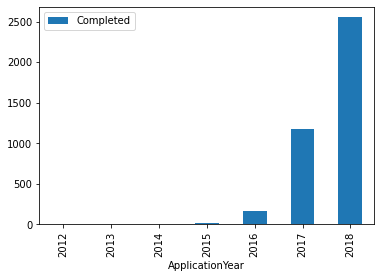

In [27]:
# it would be nice to show this as a plot
# link: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
h.plot(kind='bar',y='Completed') #index is automatically the x!

In [28]:
# with these groupby statements, we can analyze a lot!
# but first, let's drop all of those missing completed dates from the analysis (for now)
df = df.dropna()
g = df.groupby('ApplicationYear')
g.count()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771
2013,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464
2014,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497
2015,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035
2016,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537
2017,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688
2018,743,743,743,743,743,743,743,743,743,743,743,743,743,743,743,743


# Dropping rows based on value in a column

In [29]:
# since 2018 is largely incomplete, let's drop that year from the analysis
df = df[df['ApplicationYear'] < 2018]
g = df.groupby('ApplicationYear')
g.count()

# much better! Now let's keep cleaning this up

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
ApplicationYear,,,,,,,,,,,,,,,,
2012,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771,771
2013,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464
2014,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497
2015,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035,7035
2016,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537,5537
2017,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688,3688


# Coercing data types (multiple columns)
There is still sneaky data hiding as characters (strings) when it's actually numeric!

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22992 entries, 0 to 24367
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Program                             22992 non-null  object        
 1   Solarize CT                         22992 non-null  object        
 2   Date of Application                 22992 non-null  datetime64[ns]
 3   Completed                           22992 non-null  datetime64[ns]
 4   Electric Utility                    22992 non-null  object        
 5   County                              22992 non-null  object        
 6   Municipality                        22992 non-null  object        
 7   Zip Code                            22992 non-null  float64       
 8   Contractor                          22992 non-null  object        
 9   System Owner                        22992 non-null  object        
 10  System Financing      

In [31]:
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear,ApplicationMonth
0,EPBB,No,2012-03-05,2012-04-10,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,"$44,650.00","$14,982.00","10,819",2012,3
1,EPBB,No,2012-03-05,2012-11-19,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,"$40,888.00","$13,069.00","8,199",2012,3
2,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,"$33,300.00","$10,855.00","6,833",2012,3
3,EPBB,No,2012-03-05,2012-12-04,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,"$32,251.88","$12,314.00","6,559",2012,3
4,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,"$30,723.00","$11,080.00","7,140",2012,3


In [32]:
# check the data types
df.dtypes

Program                                       object
Solarize CT                                   object
Date of Application                   datetime64[ns]
Completed                             datetime64[ns]
Electric Utility                              object
County                                        object
Municipality                                  object
Zip Code                                     float64
Contractor                                    object
System Owner                                  object
System Financing                              object
System Size (kW STC)                         float64
Total System Costs                            object
Total Incentive  Approved                     object
Estimated Annual Production  (kWh)            object
ApplicationYear                                int64
ApplicationMonth                               int64
dtype: object

Look at the dtypes and then at the head... here's what looks suspicious to me...

* "System Size", 
* "Total System Costs",
* "Total Incentive Approved",
* "Estimated Annual Production"

## Clean-Up
* Get rid of the dollar sign in these columns,
* Get rid of the commas in these columns,
* THEN, coerce them to numeric. 

If you coerce first without replacing values, you will wreck your dataset (it will convert to NaN!)

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

Note: I had some trouble with this - this StackOverflow article saved me!
* https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

In [33]:
# for Total System Costs
df['Total System Costs'] = df['Total System Costs'].str.replace(',', '')
df['Total System Costs'] = df['Total System Costs'].str.replace('$', '')
df['Total System Costs'] = df['Total System Costs'].astype(float)

# for Total System  Approved (don't forget the annoying extra middle space)
df['Total Incentive  Approved'] = df['Total Incentive  Approved'].str.replace(',', '')
df['Total Incentive  Approved'] = df['Total Incentive  Approved'].str.replace('$', '')
df['Total Incentive  Approved'] = df['Total Incentive  Approved'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [34]:
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear,ApplicationMonth
0,EPBB,No,2012-03-05,2012-04-10,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,44650.00,14982.0,"10,819",2012,3
1,EPBB,No,2012-03-05,2012-11-19,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,40888.00,13069.0,"8,199",2012,3
2,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,33300.00,10855.0,"6,833",2012,3
3,EPBB,No,2012-03-05,2012-12-04,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,32251.88,12314.0,"6,559",2012,3
4,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,30723.00,11080.0,"7,140",2012,3


In [35]:
# link: https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
# you could also do it one by one as we did before, but apply is nice for multiple!
cols = ['System Size (kW STC)', 
        'Total System Costs', 
        'Total Incentive  Approved',
        'Estimated Annual Production  (kWh)'] # wow those spaces are annoying!

# here we go!        
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [36]:
print(df.dtypes)

Program                                       object
Solarize CT                                   object
Date of Application                   datetime64[ns]
Completed                             datetime64[ns]
Electric Utility                              object
County                                        object
Municipality                                  object
Zip Code                                     float64
Contractor                                    object
System Owner                                  object
System Financing                              object
System Size (kW STC)                         float64
Total System Costs                           float64
Total Incentive  Approved                    float64
Estimated Annual Production  (kWh)           float64
ApplicationYear                                int64
ApplicationMonth                               int64
dtype: object


In [37]:
df.head()

,Program,Solarize CT,Date of Application,Completed,Electric Utility,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear,ApplicationMonth
0,EPBB,No,2012-03-05,2012-04-10,Eversource Energy,Hartford,Avon,6001.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,9.50,44650.00,14982.0,NaN,2012,3
1,EPBB,No,2012-03-05,2012-11-19,Eversource Energy,Middlesex,Old Saybrook,6475.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,7.20,40888.00,13069.0,NaN,2012,3
2,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,Middlesex,Durham,6422.0,BeFree Green Energy,Does Not Apply,Other Homeowner Purchase,6.00,33300.00,10855.0,NaN,2012,3
3,EPBB,No,2012-03-05,2012-12-04,Eversource Energy,New London,Stonington,6355.0,Waldo Renewable Electric,Does Not Apply,Other Homeowner Purchase,5.76,32251.88,12314.0,NaN,2012,3
4,EPBB,No,2012-03-05,2012-05-02,Eversource Energy,New London,Lebanon,6249.0,Sunlight Solar Energy,Does Not Apply,Other Homeowner Purchase,6.27,30723.00,11080.0,NaN,2012,3


See how 'Estimated Annual Production' turned to NaN? Go add three lines of code above to fix this!

In [38]:
df.info() # if there are missing values - clean them up! and run an analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22992 entries, 0 to 24367
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Program                             22992 non-null  object        
 1   Solarize CT                         22992 non-null  object        
 2   Date of Application                 22992 non-null  datetime64[ns]
 3   Completed                           22992 non-null  datetime64[ns]
 4   Electric Utility                    22992 non-null  object        
 5   County                              22992 non-null  object        
 6   Municipality                        22992 non-null  object        
 7   Zip Code                            22992 non-null  float64       
 8   Contractor                          22992 non-null  object        
 9   System Owner                        22992 non-null  object        
 10  System Financing      

# On Your Own
Remember - as a biz analyst or data scientist, your job is to tell stories with data.

Now that the data is clean, you can do all sorts of analytics on this dataset... try to think of the business problem and come up with interesting ways to slice and dice the dataset. What insights can you derive?


Things you may want to look at:

- How many electric utilities are in CT?
- How many towns have each utility installed projects in (total count, by year)?
- How many total installations per year for each company?
- What’s the average length and standard deviation of each the application completion date by company?
- How has solar increased over the past X years? 
- Cumulative vs. regular
- Percentages
- Who is the largest contractor in terms of
- Number of Jobs
- Total installed capacity?
- What’s the average (and sd) system size installed per town, per year? Are there any noteable trends?
- What’s the average (and sd) ratio of incentive to total system costs (should be a number between 0 and 1)?
- What’s the relationship between “System Size” and “Estimated Annual Production” look like?
- How many applications are “Pending”? These are sites without an executed contract.
- What are the trends in “System Financing” - are people leasing or renting? Does this change as a function of utility?

These are maps of the different service territories of the electric utilities in Connecticut...

![service territories in CT](https://portal.ct.gov/lib/csc/elec_svc_areas-med.jpg)


In [39]:
# how many electric utilities are in CT? 
# do a groupby on that column
g = df.groupby('Electric Utility')
g.count()

# there are two, Eversource Energy and United Illuminating

,Program,Solarize CT,Date of Application,Completed,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationYear,ApplicationMonth
Electric Utility,,,,,,,,,,,,,,,,
Eversource Energy,17782,17782,17782,17782,17782,17782,17782,17782,17782,17782,17782,17782,17782,1,17782,17782
United Illuminating,5210,5210,5210,5210,5210,5210,5210,5210,5210,5210,5210,5210,5210,1,5210,5210


In [40]:
# How many towns have each utility installed projects in (total count, by year)?
g = df.groupby(['Electric Utility', 'Municipality', 'ApplicationYear'])
g.count()

Program  Solarize CT  \
Electric Utility    Municipality ApplicationYear                         
Eversource Energy   Andover      2012                   4            4   
                                 2013                   1            1   
                                 2014                   5            5   
                                 2015                   6            6   
                                 2016                   4            4   
...                                                   ...          ...   
United Illuminating Woodbridge   2013                   5            5   
                                 2014                   9            9   
                                 2015                  45           45   
                                 2016                  12           12   
                                 2017                  15           15   

                                                  Date of Application  \
Electric Utility    Municipality ApplicationYear                        
Eversource Energy   Andover      2012                               4   
                                 2013                               1   
                                 2014                               5   
                                 2015                               6   
                                 2016                               4   
...                                                               ...   
United Illuminating Woodbridge   2013                               5   
                                 2014                               9   
                                 2015                              45   
                                 2016                              12   
                                 2017                              15   

                                                  Completed  County  Zip Code  \
Electric Utility    Municipality ApplicationYear                                
Eversource Energy   Andover      2012                     4       4         4   
                                 2013                     1       1         1   
                                 2014                     5       5         5   
                                 2015                     6       6         6   
                                 2016                     4       4         4   
...                                                     ...     ...       ...   
United Illuminating Woodbridge   2013                     5       5         5   
                                 2014                     9       9         9   
                                 2015                    45      45        45   
                                 2016                    12      12        12   
                                 2017                    15      15        15   

                                                  Contractor  System Owner  \
Electric Utility    Municipality ApplicationYear                             
Eversource Energy   Andover      2012                      4             4   
                                 2013                      1             1   
                                 2014                      5             5   
                                 2015                      6             6   
                                 2016                      4             4   
...                                                      ...           ...   
United Illuminating Woodbridge   2013                      5             5   
                                 2014                      9             9   
                                 2015                     45            45   
                                 2016                     12            12   
                                 2017                     15            15   

                                                  System Financing  

In [41]:
# how many towns are served by each utility?
# link: https://stackoverflow.com/questions/41415017/count-unique-values-using-pandas-groupby
df.groupby('Electric Utility')['Municipality'].nunique()

Electric Utility
Eversource Energy      163
United Illuminating     20
Name: Municipality, dtype: int64

In [42]:
# are any towns served by two utilities?
g = df.groupby('Municipality')['Electric Utility'].nunique()
g = pd.DataFrame(g)
h = g[g['Electric Utility']>1]
h
#g.sort_values(ascending=False)

# what do these have in common? 
# if we wanted to, we could:
# 1) make a map
# 2) at least enrich with some county-level info!

# these are basically all shoreline towns

,Electric Utility
Municipality,
Branford,2
Bridgeport,2
East Haven,2
Easton,2
Fairfield,2
Guilford,2
Hamden,2
Milford,2
New Haven,2


In [43]:
# what are some other good plots we can make?
# total applications for each company
g = df.groupby(['Electric Utility', 'ApplicationYear'])
h = g.count()
h

Program  Solarize CT  \
Electric Utility    ApplicationYear                         
Eversource Energy   2012                 654          654   
                    2013                1225         1225   
                    2014                3819         3819   
                    2015                5687         5687   
                    2016                3983         3983   
                    2017                2414         2414   
United Illuminating 2012                 117          117   
                    2013                 239          239   
                    2014                 678          678   
                    2015                1348         1348   
                    2016                1554         1554   
                    2017                1274         1274   

                                     Date of Application  Completed  County  \
Electric Utility    ApplicationYear                                           
Eversource Energy   2012                             654        654     654   
                    2013                            1225       1225    1225   
                    2014                            3819       3819    3819   
                    2015                            5687       5687    5687   
                    2016                            3983       3983    3983   
                    2017                            2414       2414    2414   
United Illuminating 2012                             117        117     117   
                    2013                             239        239     239   
                    2014                             678        678     678   
                    2015                            1348       1348    1348   
                    2016                            1554       1554    1554   
                    2017                            1274       1274    1274   

                                     Municipality  Zip Code  Contractor  \
Electric Utility    ApplicationYear                                       
Eversource Energy   2012                      654       654         654   
                    2013                     1225      1225        1225   
                    2014                     3819      3819        3819   
                    2015                     5687      5687        5687   
                    2016                     3983      3983        3983   
                    2017                     2414      2414        2414   
United Illuminating 2012                      117       117         117   
                    2013                      239       239         239   
                    2014                      678       678         678   
                    2015                     1348      1348        1348   
                    2016                     1554      1554        1554   
                    2017                     1274      1274        1274   

                                     System Owner  System Financing  \
Electric Utility    ApplicationYear                                   
Eversource Energy   2012                      654               654   
                    2013                     1225              1225   
                    2014                     3819              3819   
                    2015                     5687              5687   
                    2016                     3983              3983   
                    2017                     2414              2414   
United Illuminating 2012                      117               117   
                    2013                      239               239   
                    2014                      678               678   
                    2015                     1348              1348   
                    2016                     1554              1554   
                    2017                     1274              1274   

                             

In [44]:
# can we flatten that index?
# yep! 
# link: https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
h.reset_index(inplace=True)
h

,Electric Utility,ApplicationYear,Program,Solarize CT,Date of Application,Completed,County,Municipality,Zip Code,Contractor,System Owner,System Financing,System Size (kW STC),Total System Costs,Total Incentive Approved,Estimated Annual Production (kWh),ApplicationMonth
0,Eversource Energy,2012,654,654,654,654,654,654,654,654,654,654,654,654,654,0,654
1,Eversource Energy,2013,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,0,1225
2,Eversource Energy,2014,3819,3819,3819,3819,3819,3819,3819,3819,3819,3819,3819,3819,3819,0,3819
3,Eversource Energy,2015,5687,5687,5687,5687,5687,5687,5687,5687,5687,5687,5687,5687,5687,1,5687
4,Eversource Energy,2016,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983,3983,0,3983
5,Eversource Energy,2017,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,0,2414
6,United Illuminating,2012,117,117,117,117,117,117,117,117,117,117,117,117,117,0,117
7,United Illuminating,2013,239,239,239,239,239,239,239,239,239,239,239,239,239,1,239
8,United Illuminating,2014,678,678,678,678,678,678,678,678,678,678,678,678,678,0,678
9,United Illuminating,2015,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,1348,0,1348


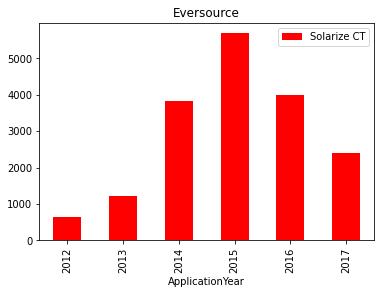

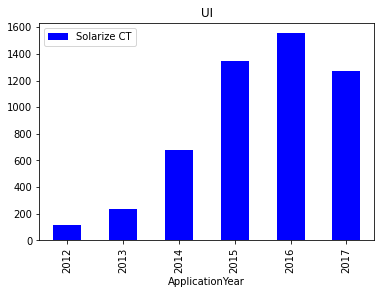

In [45]:
# subset, then plot per group
tmp = h.iloc[:,[0,1,3]]
tmp

# now make the plots
tmp[tmp["Electric Utility"]=="Eversource Energy"].plot.bar(x="ApplicationYear", y="Solarize CT", color="red", title="Eversource")
tmp[tmp["Electric Utility"]=="United Illuminating"].plot.bar(x="ApplicationYear", y="Solarize CT", color="blue", title="UI")

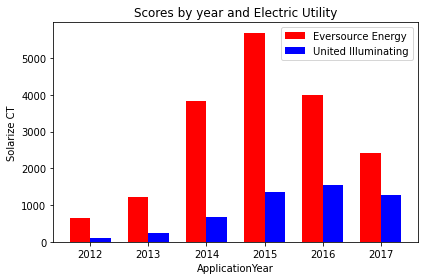

In [46]:
# can we show as a graph?
# can we show total, and by utility?
# then instead of counts, show as a percentage?
x = np.arange(len(tmp["ApplicationYear"].unique()))  # the label locations
width = 0.35  # the width of the bars
EE = tmp[tmp["Electric Utility"]=="Eversource Energy"]
UI = tmp[tmp["Electric Utility"]=="United Illuminating"]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, EE["Solarize CT"], width, color="red", label='Eversource Energy')
rects2 = ax.bar(x + width/2, UI["Solarize CT"], width, color="blue", label='United Illuminating')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Solarize CT')
ax.set_xlabel('ApplicationYear')
ax.set_title('Scores by year and Electric Utility')
ax.set_xticks(x)
ax.set_xticklabels(tmp["ApplicationYear"].unique())
ax.legend()

fig.tight_layout()

plt.show()

In [47]:
# with this same methodology, we can show the average, sd, min, max of each column
# here is a good reference on this data processing stuff
# link: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [48]:
df.groupby('Municipality').agg(['mean','std','min','max'])

Zip Code                            System Size (kW STC)  \
                      mean        std     min     max                 mean   
Municipality                                                                 
Andover        6232.000000   0.000000  6232.0  6232.0             8.283750   
Ansonia        6401.000000   0.000000  6401.0  6401.0             6.902581   
Ashford        6268.260870  13.408927  6250.0  6278.0             8.011304   
Avon           6001.000000   0.000000  6001.0  6001.0             8.845429   
Barkhamsted    6063.054054   0.328798  6063.0  6065.0             9.060811   
...                    ...        ...     ...     ...                  ...   
Windsor Locks  6096.000000   0.000000  6096.0  6096.0             7.190955   
Wolcott        6714.438710   3.851267  6705.0  6716.0             8.535290   
Woodbridge     6525.000000   0.000000  6525.0  6525.0             9.164176   
Woodbury       6798.000000   0.000000  6798.0  6798.0             8.983243   
Woodstock      6280.792793   3.539690  6244.0  6282.0             8.431171   

                                     Total System Costs                ...  \
                    std   min    max               mean           std  ...   
Municipality                                                           ...   
Andover        3.236412  3.25  16.08       34425.495417  14927.670951  ...   
Ansonia        2.715516  2.60  14.56       26881.523306  11291.039157  ...   
Ashford        3.034738  2.34  18.75       34455.705435  14876.061331  ...   
Avon           3.366058  1.82  19.71       33885.346286  13422.099188  ...   
Barkhamsted    2.970207  4.16  15.53       35717.827568  12064.824296  ...   
...                 ...   ...    ...                ...           ...  ...   
Windsor Locks  2.715391  2.50  16.82       28738.457580  12584.844843  ...   
Wolcott        3.853142  1.08  26.81       36668.269613  16437.209538  ...   
Woodbridge     3.675687  2.60  23.91       36899.781209  14985.161636  ...   
Woodbury       4.158858  2.55  21.44       39760.550000  17075.766147  ...   
Woodstock      2.888037  2.75  17.66       37276.998198  20728.603036  ...   

              Estimated Annual Production  (kWh)     ApplicationYear  \
                                             min max            mean   
Municipality                                                           
Andover                                      NaN NaN     2014.708333   
Ansonia                                      NaN NaN     2015.524194   
Ashford                                      NaN NaN     2014.543478   
Avon                                         NaN NaN     2015.095238   
Barkhamsted                                  NaN NaN     2015.000000   
...                                          ...  ..             ...   
Windsor Locks                                NaN NaN     2015.178344   
Wolcott                                      NaN NaN     2015.212903   
Woodbridge                                   NaN NaN     2015.153846   
Woodbury                                     NaN NaN     2014.837838   
Woodstock                                    NaN NaN     2014.621622   

                                    ApplicationMonth                    
                    std   min   max             mean       std min max  
Municipality                                                            
Andover        1.654484  2012  2017         7.208333  2.992442   3  12  
Ansonia        1.129528  2012  2017         7.911290  3.092115   1  12  
Ashford        1.199020  2012  2017         5.608696  3.526841   1  12  
Avon           1.189083  2012  2017         5.771429  3.464815   1  12  
Barkhamsted    1.130388  2012  2016         7.027027  2.783747   1  12  
...                 ...   ...   ...              ...       ...  ..  ..  
Windsor Locks  1.046993  2012  2017         5.987261  3.314667   1  12  
Wolcott        1.156501  2012  2017         6.593548  3.612203   1  12  
Woodbridge     1.182

# (optional) Make a pivot table!
Read the documentation for a pivot table, then give it a try!
* https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

You will just need to change the numpy functions in a list like this [np.mean, np.std]